In [1]:

from implicit.nearest_neighbours import bm25_weight
from implicit.als import AlternatingLeastSquares
from scipy.sparse import csr_matrix
import pandas as pd
import spotipy
import sys
from tqdm import tqdm
from spotipy.oauth2 import SpotifyClientCredentials

import numpy as np
from ipynb.fs.full.Model import *
from ipynb.fs.full.Spotify_Functions import *
from ipynb.fs.full.Load_Starting_Files import *
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
import networkx as nx

import warnings
warnings.filterwarnings('ignore')

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)

In [2]:
client_id = 'add_client_id'
client_secret = 'add_client_secret'

spotify = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                                client_secret=client_secret))

In [3]:
def plot_exploratoryness(track_expo, artist_expo,title,l_lim=0, h_lim= 10):

    figure, axis = plt.subplots(1, 2, figsize = (20,6), sharex = True)
    
    plt.xlabel = "Iteration"
    plt.ylabel = "Track Exploratoryness"
    axis[0].set_title("Track Exploration")
    axis[1].set_title("Number of Unique Artists")
    axis[0].set_xlabel("Set of Recommendations")
    axis[1].set_xlabel("Set of Recommendations")
    for key in list(track_expo.keys())[l_lim:h_lim]:
        #print(key)
        axis[0].plot(range(0, len(track_expo[key])*5, 5), track_expo[key])
        
        axis[1].plot(range(0, len(artist_expo[key])*5, 5), artist_expo[key])
    

In [4]:
def plot_high_low(test_explo, test_artist, sample_ids, legend_one, legend_two):    
    high_low = sample_ids[:5] + sample_ids[-5:]
    explo = {}
    artist = {}
    for key in high_low:
        explo[key] = test_explo[key]
        artist[key] = test_artist[key]
    figure, axis = plt.subplots(1, 2, figsize = (20,6), sharex = True)

    plt.xlabel = "Iteration"
    plt.ylabel = "Track Exploratoryness"
    axis[0].set_title("Track Exploration")
    axis[1].set_title("Number of Unique Artists")
    axis[0].set_xlabel("Set of Recommendations")
    axis[1].set_xlabel("Set of Recommendations")

    first = sample_ids[0]
    axis[0].plot(range(0, len(explo[first])*5, 5), explo[first], '--b')
    axis[1].plot(range(0, len(artist[first])*5, 5), artist[first], '--b')

    last = sample_ids[-1]
    axis[0].plot(range(0, len(explo[last])*5, 5), explo[last], '-r')
    axis[1].plot(range(0, len(artist[last])*5, 5), artist[last], '-r')

    for key in list(sample_ids[1:5]):
        axis[0].plot(range(0, len(explo[key])*5, 5), explo[key], '--b')
        axis[1].plot(range(0, len(artist[key])*5, 5), artist[key], '--b')

    for key in list(sample_ids[-5:-1]):
        axis[0].plot(range(0, len(explo[key])*5, 5), explo[key], '-r')
        axis[1].plot(range(0, len(artist[key])*5, 5), artist[key], '-r')
    plt.legend([legend_one,legend_two], loc = 1) 
    plt.show()

In [5]:
def unique_artist_in_recommendations(recommendations):
    unique_artists = {}
    n_unique = []
    for set_rec in recommendations:
        for artist in set_rec['artistName']:
            if artist in unique_artists.keys():
                unique_artists[artist] += 1
            else:
                unique_artists[artist] = 1
        n_unique.append(len(unique_artists.keys()))
    return(unique_artists, n_unique)

In [6]:
def draw_network(model, sample_ids):
    connected = []
    for userid in sample_ids:
        similar_users, similar_scores = model.similar_users(userid)
        for i in range(2):
            connected.append((userid, similar_users[i+1]))
    g= nx.Graph()
    for source, target in connected:
        g.add_edge(source, target)
    nx.draw(g)
    print(nx.is_connected(g))
    return(g)

In [8]:
uk_data = pd.read_pickle('../cleaned_data/uk_data.pkl')
pl_data = pd.read_pickle('../cleaned_data/pl_data.pkl')
us_data = pd.read_pickle('../cleaned_data/us_data.pkl')

# Test 1 N_Sim = 50, N_Users = 50, Decay = False

100%|███████████████████████████████████████████| 50/50 [01:42<00:00,  2.05s/it]


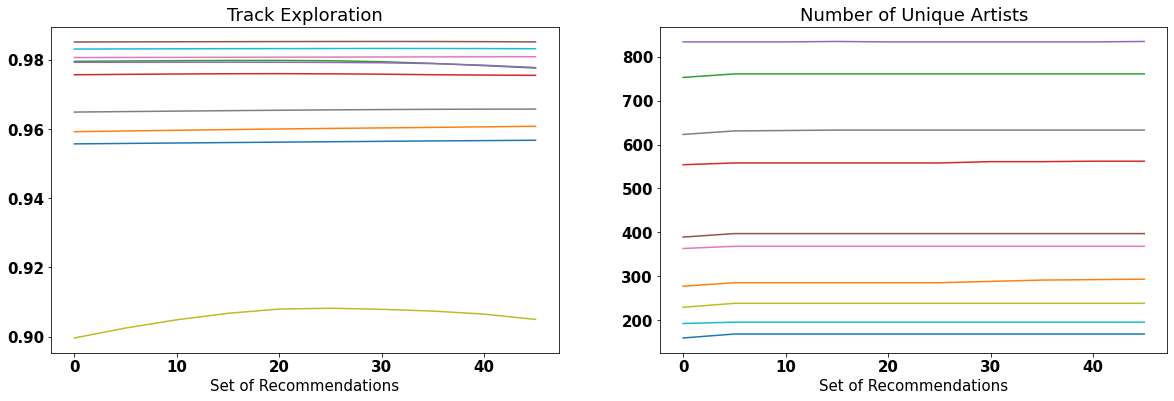

In [10]:
sample_ids = np.random.choice(uk_data['userID'].unique(), 50, replace = False)
test_explo, test_art, test_predictions, test_model = simulate_model(uk_data, 50,sample_ids, decay = False)
plot_exploratoryness(test_explo,test_art, "50 Users, 50 Simulations, Decay = False")

100%|███████████████████████████████████████████| 50/50 [02:56<00:00,  3.53s/it]


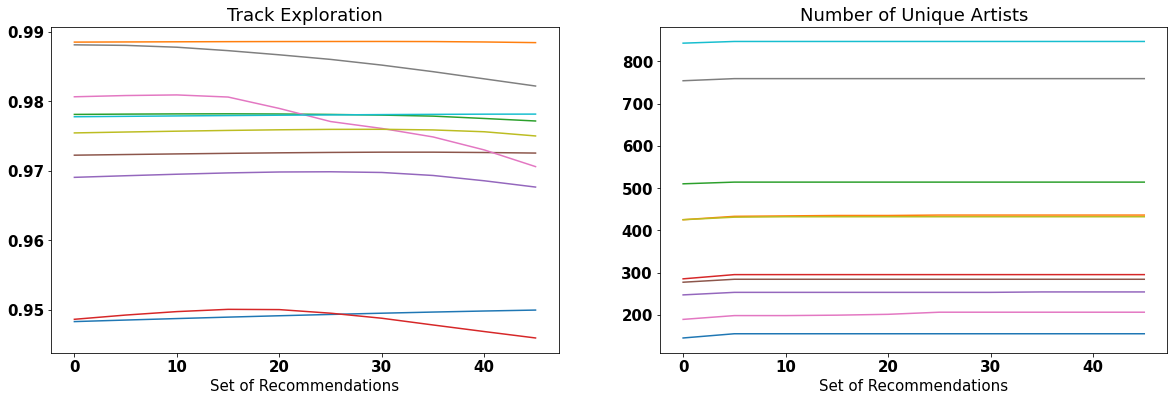

In [15]:
sample_ids = np.random.choice(us_data['userID'].unique(), 50, replace = False)
test_explo, test_art, test_predictions, test_model = simulate_model(us_data, 50,sample_ids, decay = False)
plot_exploratoryness(test_explo,test_art, "50 Users, 50 Simulations, Decay = False")

100%|███████████████████████████████████████████| 50/50 [01:44<00:00,  2.09s/it]


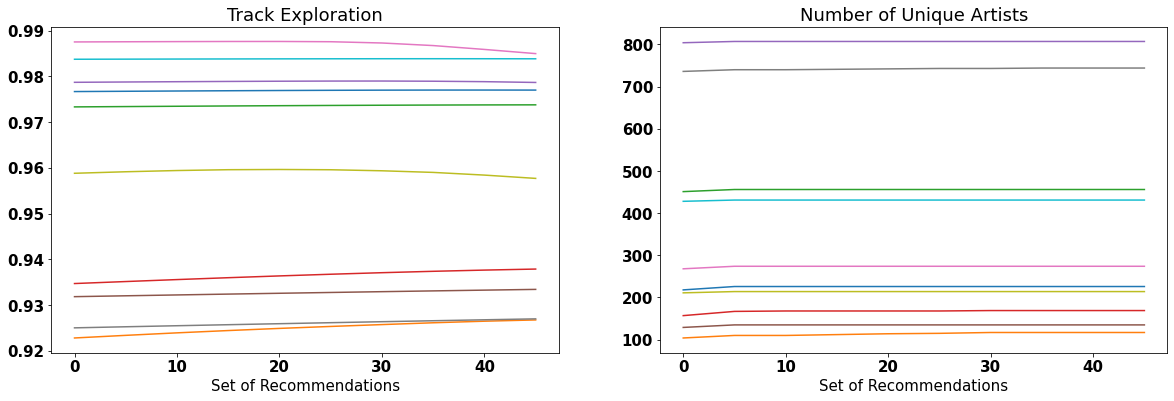

In [12]:
sample_ids = np.random.choice(pl_data['userID'].unique(), 50, replace = False)
test_explo, test_art, test_predictions, test_model = simulate_model(pl_data, 50,sample_ids, decay = False)
plot_exploratoryness(test_explo,test_art, "50 Users, 50 Simulations, Decay = False")

# Test 2 N_Sim = 50, N_Users = all UK, Decay = False

In [ ]:
test_explo, test_art, test_predictions, test_model = simulate_model(uk_data, 50, uk_data['userID'].unique(), decay = False)
plot_exploratoryness(test_explo,test_art, "50 Users, 50 Simulations, Decay = False")

# Test 3 N_Sim = 50, N_Users = 50, Decay = True

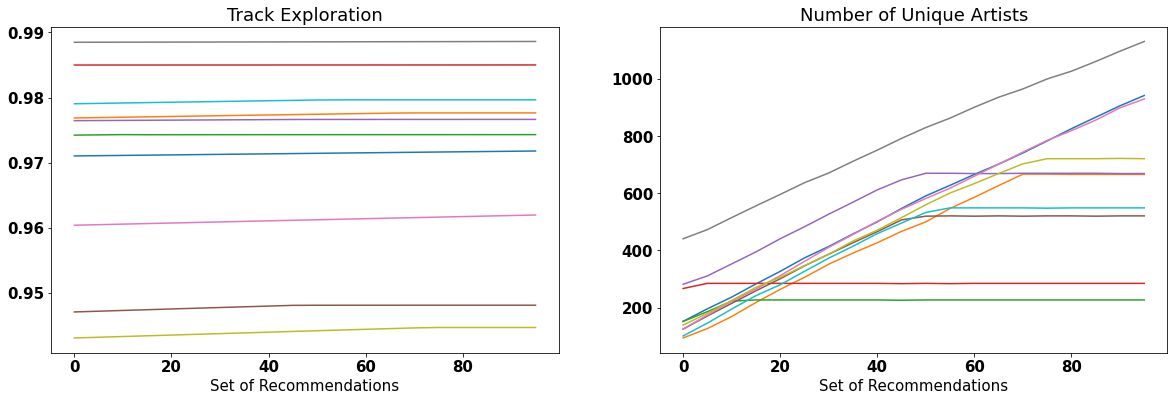

In [44]:
sample_ids = np.random.choice(uk_data['userID'].unique(), 50, replace = False)
test_explo, test_art, test_predictions, test_model = simulate_model(uk_data, 50,sample_ids, decay = True, n_decay = 50)
plot_exploratoryness(test_explo,test_art, "50 Users, 50 Simulations, Decay = True", l_lim = 30, h_lim = 40)

In [119]:
uk_data[uk_data['userID'] == 839].count()

artist-MBID      1909
count            1909
userMBID         1909
recordingMBID    1909
trackName        1909
userID           1909
trackID          1909
artistName       1909
dtype: int64

In [118]:
uk_data[uk_data['userID'] == 388].count()

artist-MBID      5234
count            5234
userMBID         5234
recordingMBID    5234
trackName        5234
userID           5234
trackID          5234
artistName       5234
dtype: int64

100%|███████████████████████████████████████████| 50/50 [03:08<00:00,  3.76s/it]


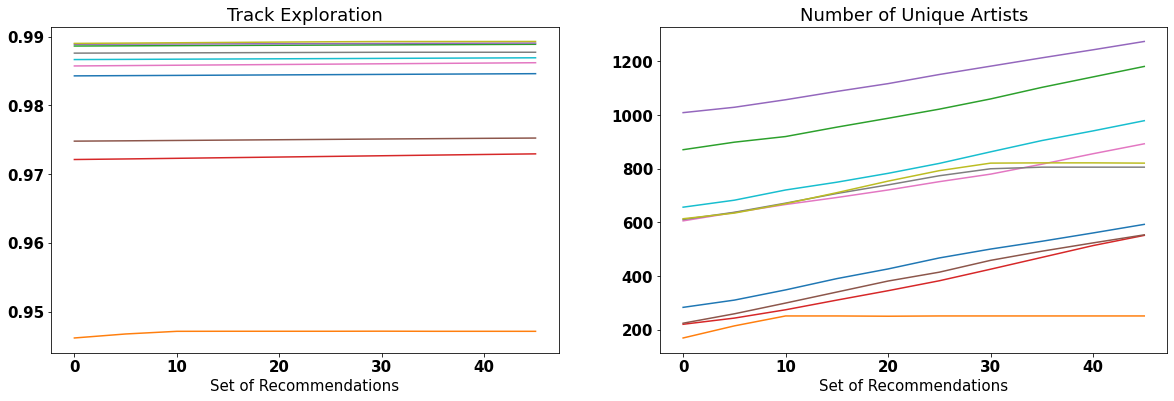

In [28]:
sample_ids = np.random.choice(us_data['userID'].unique(), 50, replace = False)
test_explo, test_art, test_predictions, test_model = simulate_model(us_data, 50,sample_ids, decay = True, n_decay = 50)
plot_exploratoryness(test_explo,test_art, "50 Users, 50 Simulations, Decay = True")

In [11]:
sample_ids = np.random.choice(pl_data['userID'].unique(), 50, replace = False)
test_explo, test_art, test_predictions, test_model = simulate_model(pl_data, 50,sample_ids, decay = True, n_decay = 50)
plot_exploratoryness(test_explo,test_art, "50 Users, 50 Simulations, Decay = True", l_lim = 5, h_lim = 10)

KeyboardInterrupt: 

100%|███████████████████████████████████████████| 50/50 [01:39<00:00,  1.98s/it]


455
562
201
339
883


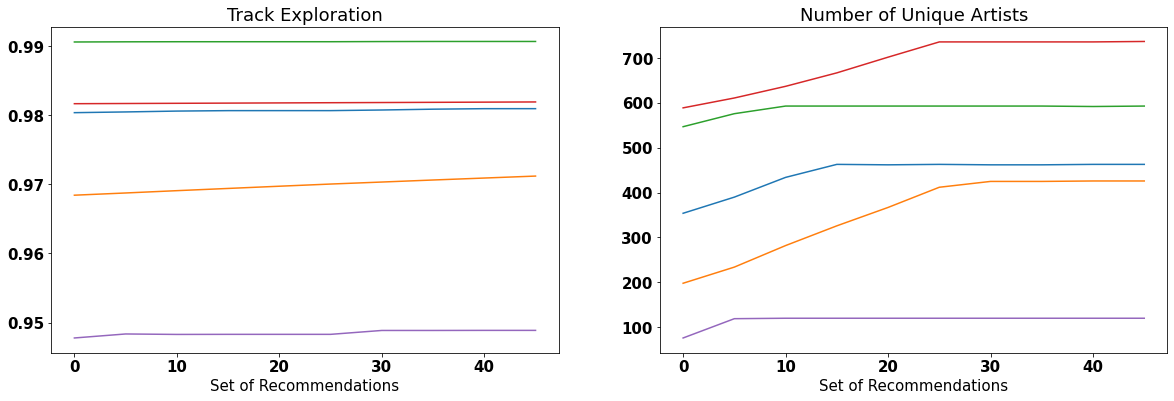

In [213]:
sample_ids = np.random.choice(pl_data['userID'].unique(), 50, replace = False)
test_explo, test_art, test_predictions, test_model = simulate_model(pl_data, 50,sample_ids, decay = True, n_decay = 25)
plot_exploratoryness(test_explo,test_art, "50 Users, 50 Simulations, Decay = True", l_lim = 5, h_lim = 10)

In [212]:
unique_artist_in_recommendations(test_predictions[741])

({'Daft Punk': 3,
  'Led Zeppelin': 2,
  'Nirvana': 9,
  'Natural Dread Killaz': 1,
  'Hey': 4,
  'Indios Bravos': 3,
  'Behemoth': 1,
  'Puscifer': 1,
  'Audioslave': 1,
  'Katy Perry': 1,
  'Junior Boys': 1,
  'Erykah Badu': 3,
  'Red Hot Chili Peppers': 4,
  'Paradise Lost': 3,
  'Supergrass': 1,
  'Norah Jones': 1,
  'Röyksopp': 1,
  'The Hives': 1,
  'Ordo Rosarius Equilibrio': 1,
  'Brodka': 1,
  'Eluveitie': 3,
  'Coldplay': 3,
  'Vampire Weekend': 2,
  'Fokus': 1,
  'Maria Peszek': 1,
  'Interpol': 1,
  'Dream Theater': 3,
  'Jamal': 1,
  'Metallica': 3,
  'Hunter': 3,
  'HeartsRevolution': 1,
  'Stone Sour': 2,
  'Tegan and Sara': 1,
  'Tenacious D': 2,
  'The Beatles': 3,
  'Yeah Yeah Yeahs': 1,
  'Łąki Łan': 1,
  'System of a Down': 1,
  'Bat for Lashes': 1,
  'Rammstein': 2,
  'The Streets': 1,
  'Rise Against': 3,
  'Dead Can Dance': 1,
  'August Burns Red': 2,
  'Hoobastank': 3,
  'James Blake': 1,
  'Christina Aguilera': 1,
  'Indigo Tree': 1,
  'Megadeth': 1,
  'Testame

# Compare effect of listening history

In [124]:
uk_data[uk_data['userID']==88]

,artist-MBID,count,userMBID,recordingMBID,trackName,userID,trackID,artistName
110,9f336c50-ae4c-4440-bda7-958aa12bc15a,33,7964c847-9d28-410e-b400-5638d978e3c5,00286ecf-4ea4-461d-a231-894fe38812a3,Black Hearts Now Reign,88,18,Unearth
330,ae1b47d5-5128-431c-9d30-e08fd90e0767,1,7964c847-9d28-410e-b400-5638d978e3c5,00964131-66d9-4967-922a-ee8028f53f50,Here We Are Juggernaut,88,60,Coheed and Cambria
436,c0b2500e-0cef-4130-869d-732b23ed9df5,2,7964c847-9d28-410e-b400-5638d978e3c5,00b6c447-feec-4a30-b9ca-c1f5be057146,Taxi Ride,88,68,Tori Amos
448,19ef229f-d073-494e-9d0a-f0e8ff05dc3e,8,7964c847-9d28-410e-b400-5638d978e3c5,00bc8b38-9bce-4b02-8cf3-9f5e58858d0d,Dead Weight as Far as the Eye Can See,88,71,Destroyer Destroyer
1273,1946a82a-f927-40c2-8235-38d64f50d043,4,7964c847-9d28-410e-b400-5638d978e3c5,01e713e8-575a-4ff6-9631-64e6cca21500,Song to the Siren,88,171,The Chemical Brothers
...,...,...,...,...,...,...,...,...
1543688,2ab3e03b-1beb-4749-ae82-9c32e6ca6d67,2,7964c847-9d28-410e-b400-5638d978e3c5,f61ec621-6ca4-4533-9971-ae6ce16085e2,I Found Your Diary,88,355840,The Banner
1543710,29ab0e01-6262-4b7b-8271-0b1983bde211,3,7964c847-9d28-410e-b400-5638d978e3c5,f6ac930d-efef-4139-9904-0f81421a6408,Fiction,88,355847,Inhale Exhale
1543733,cb07b399-6917-4b60-8254-085a6eb39b4f,2,7964c847-9d28-410e-b400-5638d978e3c5,f79838d9-0ab8-4db4-a94c-f5fc29d46b0e,Water Thank You,88,355863,Dorian Concept
1543853,56abaa47-0101-463b-b37e-e961136fec39,6,7964c847-9d28-410e-b400-5638d978e3c5,fc69edfb-88b6-4e95-b838-df1a1b55430c,Kakenrooken Stivlobits,88,355911,Venetian Snares


100%|█████████████████████████████████████████| 100/100 [04:15<00:00,  2.56s/it]
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


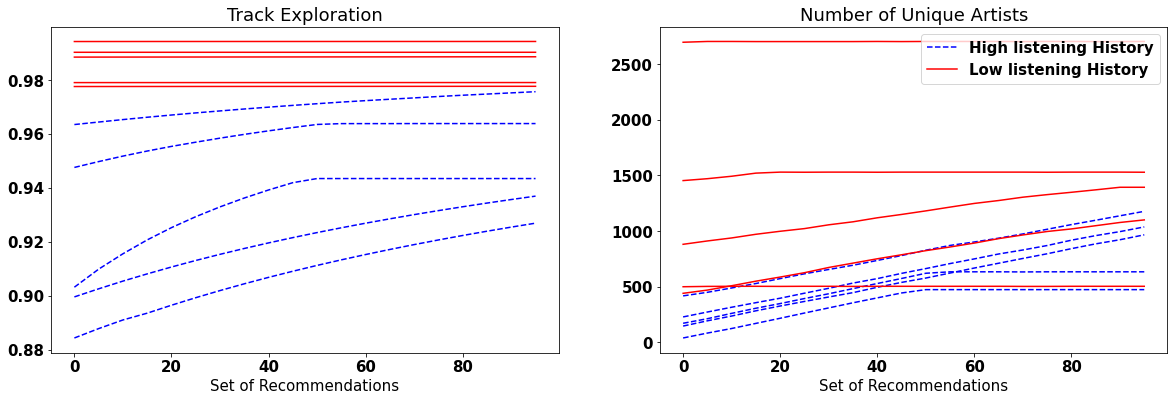

In [11]:
listening_amount = uk_data.groupby('userID').sum('count').sort_values('count')
sample_ids = list(listening_amount.index[:25]) + list(listening_amount.index[-25:])

test_explo, test_artist, test_predictions, test_model = simulate_model(uk_data, 100,sample_ids, decay = True, n_decay = 200)
plot_high_low(test_explo,test_art, sample_ids, "High listening History", "Low listening History")

# Variety of Artists in Recommendations.

In [25]:
list(test_art.keys())[-5:]

[703, 633, 372, 522, 88]

In [34]:
unique_artists, n_unique = unique_artist_in_recommendations(test_predictions[703])

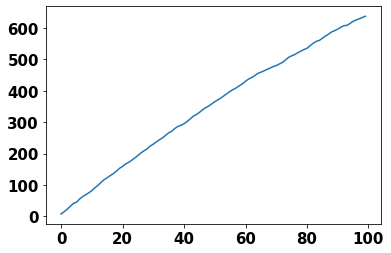

In [37]:
plt.plot(range(len(n_unique)), n_unique)

# Effect of Exploratoryness

100%|█████████████████████████████████████████| 100/100 [04:18<00:00,  2.58s/it]


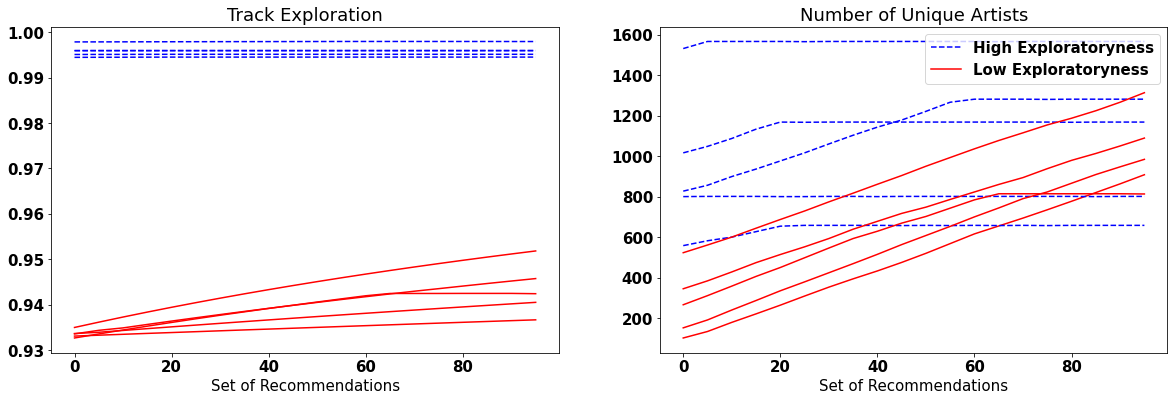

In [204]:
exploratoryness = {}
for userid in uk_data['userID'].unique():
    user_history = uk_data[uk_data['userID'] == userid]
    exploratoryness[userid] = track_exploratoryness(user_history) 
    
sample_ids = []
for i in range(25):
    sample_ids.append(max(exploratoryness, key=similar.get))
    del exploratoryness[sample_ids[-1]]
for i in range(25):
    sample_ids.append(min(exploratoryness, key=similar.get))
    del exploratoryness[sample_ids[-1]]
    

test_explo, test_art, test_predictions, test_model = simulate_model(uk_data, 100, sample_ids, decay = True, n_decay = 100)
plot_high_low(test_explo,test_art, sample_ids, "High Exploratoryness", "Low Exploratoryness")

In [201]:
sample_ids = list(uk_uuids.index)

100%|█████████████████████████████████████████| 100/100 [03:59<00:00,  2.39s/it]


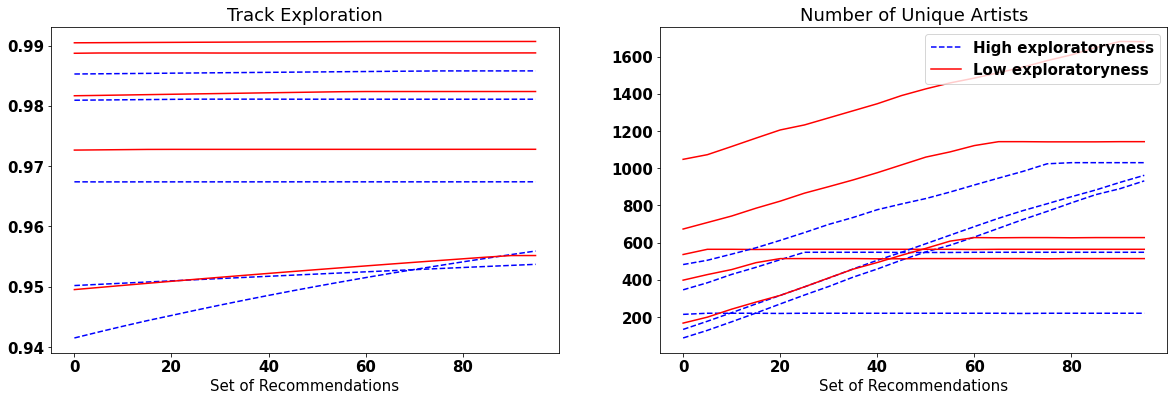

In [202]:
test_explo, test_art, test_predictions, test_model = simulate_model(uk_data, 100,sample_ids, decay = True, n_decay = 100)
plot_high_low(test_explo,test_art, sample_ids, "High exploratoryness", "Low exploratoryness")

# Users with high similarity to another user

In [214]:
model, _ = create_model(us_data)
similar = {}
for userid in us_data['userID'].unique():
    similar_user, similar_score = model.similar_users(userid)
    similar[userid] = sum(similar_score)
    
sample_ids = []
for i in range(25):
    sample_ids.append(max(similar, key=similar.get))
    del similar[sample_ids[-1]]
for i in range(25):
    sample_ids.append(min(similar, key=similar.get))
    del similar[sample_ids[-1]]
    
    

test_explo, test_art, test_predictions, test_model = simulate_model(us_data, 100, sample_ids, decay = True, n_decay = 100)
plot_high_low(test_explo,test_art, sample_ids, "High similarity", "Low similarity")

KeyError: 1070

# User's with low unqiue artists compared to tracks listened

100%|█████████████████████████████████████████| 100/100 [04:01<00:00,  2.41s/it]


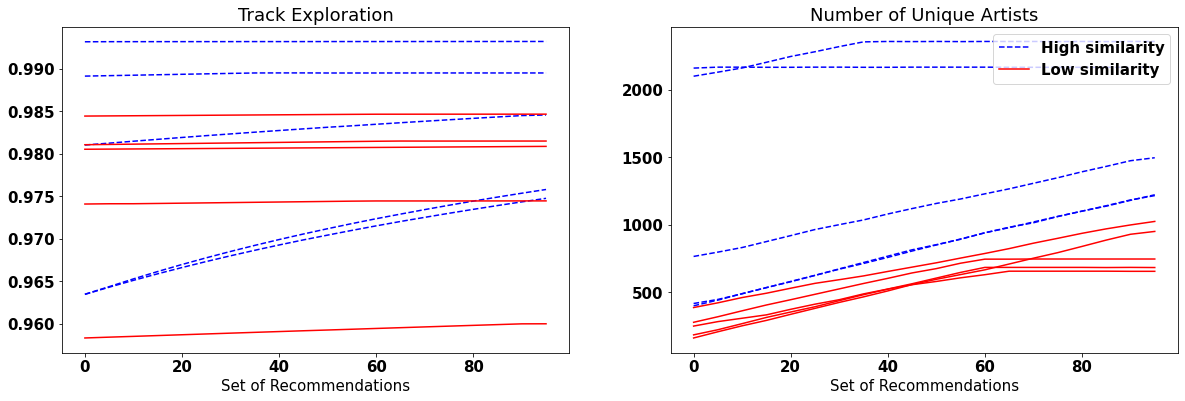

In [42]:
artist_exploratoryness = {}
for userid in uk_data['userID'].unique():
    user_history = uk_data[uk_data['userID'] == userid]
    artist_exploratoryness[userid] = len(user_history['artist-MBID'].unique())/np.sum(user_history.groupby('artist-MBID').sum('count')['count'])#.sort_values(ascending = False)
    
sample_ids = []
for i in range(25):
    sample_ids.append(max(artist_exploratoryness, key=artist_exploratoryness.get))
    del artist_exploratoryness[sample_ids[-1]]
for i in range(25):
    sample_ids.append(min(artist_exploratoryness, key=artist_exploratoryness.get))
    del artist_exploratoryness[sample_ids[-1]]
    

test_explo, test_art, test_predictions, test_model = simulate_model(uk_data, 100, sample_ids, decay = True, n_decay = 100)
plot_high_low(test_explo,test_art, sample_ids, "High similarity", "Low similarity")

# Effect on Polarization

See if the recommendation system generates polarization for each of the users.

### Test for 50 users.

In [47]:
model, _ = create_model(us_data)
sample_ids = np.random.choice(us_data['userID'].unique(), 50, replace = False)
similar_before = {}

for userid in sample_ids:
    similar_user, similar_score = model.similar_users(userid)
    similar_before[userid] = sum(similar_score)

test_explo, test_art, test_predictions, test_model = simulate_model(us_data, 100, sample_ids, decay = True, n_decay = 100)

similar_after = {}
for userid in sample_ids:
    similar_user, similar_score = test_model.similar_users(userid)
    similar_after[userid] = sum(similar_score)

100%|█████████████████████████████████████████| 100/100 [06:07<00:00,  3.67s/it]


In [51]:
difference = []
for key in similar_before.keys():
    difference.append(similar_after[key] - similar_before[key])
np.mean(difference)

2.920476440191269

### Clustering Coefficient

In [52]:
similar_before = {}
model_before, _ = create_model(uk_data)
for userid in uk_data['userID'].unique():
    similar_user, similar_score = model_before.similar_users(userid)
    similar_before[userid] = (similar_user, similar_score)

t_explo, a_explo, predictions, model_after = simulate_model(uk_data, 100, list(uk_data['userID'].unique()), decay = True, n_decay = 100)

similar_after = {}
for userid in list(uk_data['userID'].unique()):
    similar_user, similar_score = model_after.similar_users(userid)
    similar_after[userid] = (similar_user, similar_score)

100%|███████████████████████████████████████| 100/100 [1:28:25<00:00, 53.06s/it]


In [71]:
def make_network(similarities):
    g= nx.Graph() 
    for column in similarities.columns:
        for node in similarities.loc[0][column]:
            if node != column:
                g.add_edge(column, node)
    return(g)

In [73]:
g_before = make_network(something)

In [74]:
g_after = make_network(something_after)

In [77]:
nx.average_clustering(g_before)

0.07714296126630953

In [75]:
nx.average_clustering(g_after)

0.37500306753512747

In [90]:
for node in g_after.nodes():
    if nx.clustering(g_after, nodes = node) > 0.9:
        print(node)

98
265
263
565
481


In [99]:
users_before, score_before = model_before.similar_users(98, len(uk_data['userID'].unique()))

users_after, score_after = model_after.similar_users(98, len(uk_data['userID'].unique()))

#print(np.mean(score_before))
#np.mean(score_after)

0.009697596


0.30580717

In [105]:
np.sort(score_before)

array([-4.80708897e-01, -4.17594850e-01, -3.93676013e-01, -3.81221265e-01,
       -3.47333819e-01, -3.16864491e-01, -3.16171944e-01, -3.07384044e-01,
       -3.06938112e-01, -3.05550158e-01, -3.04187924e-01, -3.01896244e-01,
       -2.93764740e-01, -2.89690644e-01, -2.86413461e-01, -2.85481751e-01,
       -2.84188122e-01, -2.78706610e-01, -2.66694993e-01, -2.63520151e-01,
       -2.62008876e-01, -2.61755019e-01, -2.57909656e-01, -2.56529152e-01,
       -2.54494727e-01, -2.52849996e-01, -2.45805800e-01, -2.43726790e-01,
       -2.43660554e-01, -2.40590841e-01, -2.35929921e-01, -2.34997630e-01,
       -2.33212590e-01, -2.32975021e-01, -2.24406779e-01, -2.21428394e-01,
       -2.17068598e-01, -2.16669917e-01, -2.15705886e-01, -2.15423524e-01,
       -2.13959694e-01, -2.13776246e-01, -2.13763446e-01, -2.11595520e-01,
       -2.11330071e-01, -2.11183161e-01, -2.09770560e-01, -2.08729669e-01,
       -2.08067715e-01, -2.07826808e-01, -2.06811205e-01, -2.02516645e-01,
       -1.97987333e-01, -

<BarContainer object of 883 artists>

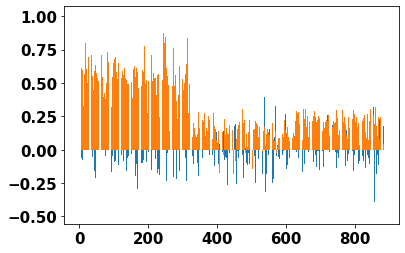

In [101]:
plt.bar(users_before, score_before)
plt.bar(users_after, score_after)

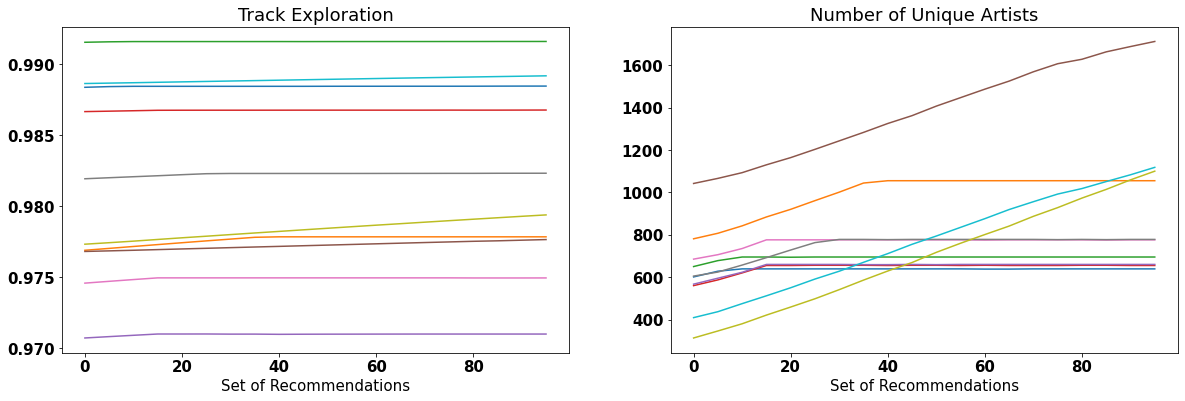

In [91]:
plot_exploratoryness(t_explo, a_explo, [98,265,263,565,481])

In [76]:
nx.is_connected(g_after)

True

In [56]:
something_after = pd.DataFrame(similar_after)

In [ ]:
sample_ids = np.random.choice(uk_data['userID'].unique(), 500)
model, user_plays = create_model(uk_data, factors = 64, regularization = 0.0, bm25 = True, iterations = 15, alpha = 1.0)
g = draw_network(model, sample_ids)

In [ ]:
nx.number_connected_components(g)

In [57]:
something_after.to_csv('../../cleaned_data/similarity_after.csv')

In [59]:
something

,0,1,2,3,4,5,6,7,8,9,...,839,879,859,845,863,882,881,871,817,768
0,"[0, 146, 97, 214, 351, 117, 267, 235, 692, 531]","[1, 393, 85, 475, 805, 625, 601, 136, 715, 583]","[2, 106, 694, 224, 353, 3, 87, 443, 435, 86]","[3, 60, 384, 379, 106, 684, 435, 752, 115, 2]","[4, 481, 471, 707, 107, 723, 560, 299, 568, 637]","[5, 627, 213, 480, 726, 851, 661, 430, 566, 616]","[6, 511, 328, 487, 540, 308, 322, 51, 314, 386]","[7, 608, 794, 393, 278, 330, 616, 617, 16, 552]","[8, 593, 827, 488, 211, 734, 169, 568, 863, 155]","[9, 404, 574, 74, 792, 586, 102, 26, 520, 93]",...,"[839, 195, 873, 13, 797, 16, 602, 870, 289, 401]","[879, 172, 600, 809, 516, 880, 391, 533, 771, ...","[859, 654, 755, 155, 59, 419, 87, 778, 226, 193]","[845, 369, 672, 558, 757, 792, 602, 317, 752, ...","[863, 274, 14, 8, 149, 820, 155, 467, 117, 271]","[882, 503, 854, 613, 730, 759, 83, 233, 652, 291]","[881, 59, 566, 37, 391, 704, 401, 41, 874, 637]","[871, 236, 725, 438, 808, 440, 186, 469, 803, ...","[817, 153, 531, 412, 142, 839, 756, 69, 411, 410]","[768, 213, 569, 189, 676, 100, 398, 518, 293, ..."
1,"[1.0, 0.40447617, 0.4026517, 0.39301267, 0.374...","[1.0000001, 0.43417877, 0.4086778, 0.36493632,...","[1.0, 0.46405932, 0.3728199, 0.35341093, 0.341...","[1.0, 0.44925222, 0.43644276, 0.3748329, 0.361...","[1.0, 0.38882023, 0.3671003, 0.36068958, 0.359...","[1.0, 0.4342911, 0.38760358, 0.369174, 0.36890...","[0.9999999, 0.546283, 0.37208176, 0.36469638, ...","[0.9999999, 0.44422704, 0.4173196, 0.37204057,...","[0.9999999, 0.45484215, 0.44750547, 0.41741088...","[0.99999994, 0.4133659, 0.38819543, 0.38792282...",...,"[0.9999999, 0.4333281, 0.4030445, 0.39057, 0.3...","[1.0, 0.5097389, 0.44680008, 0.43375778, 0.429...","[1.0, 0.5321677, 0.4228603, 0.39948705, 0.3786...","[1.0000001, 0.5028866, 0.4512319, 0.40764877, ...","[1.0000001, 0.4267051, 0.36317855, 0.35982925,...","[1.0000002, 0.46115354, 0.4253816, 0.40823674,...","[0.9999999, 0.49272022, 0.39394763, 0.37637937...","[1.0, 0.500681, 0.46834537, 0.45422623, 0.4196...","[1.0, 0.41787967, 0.37663713, 0.36570385, 0.34...","[1.0000001, 0.45992443, 0.43409804, 0.4024738,..."


In [106]:
uk_data

,artist-MBID,count,userMBID,recordingMBID,trackName,userID,trackID,artistName
0,46a31d29-e073-44c8-b4de-54b31f37d0de,2,8c2d5205-4604-4aea-8353-1be0f8360a94,0006867e-b3a3-4f1c-9cb3-89a34086c7ff,Albatross,0,0,Wild Beasts
1,46a31d29-e073-44c8-b4de-54b31f37d0de,1,16522be8-d196-4509-89e2-6c5ae52dfe9a,0006867e-b3a3-4f1c-9cb3-89a34086c7ff,Albatross,1,0,Wild Beasts
2,46a31d29-e073-44c8-b4de-54b31f37d0de,5,4380c535-a294-4b8a-b275-13f46b5d4774,0006867e-b3a3-4f1c-9cb3-89a34086c7ff,Albatross,2,0,Wild Beasts
3,46a31d29-e073-44c8-b4de-54b31f37d0de,7,52d5d900-bca1-4b39-9577-54d08b8625fe,0006867e-b3a3-4f1c-9cb3-89a34086c7ff,Albatross,3,0,Wild Beasts
4,46a31d29-e073-44c8-b4de-54b31f37d0de,2,b10b5b74-eee8-4dd9-a19e-a2dcd8d1b3ce,0006867e-b3a3-4f1c-9cb3-89a34086c7ff,Albatross,4,0,Wild Beasts
...,...,...,...,...,...,...,...,...
1189947,14962b84-c46a-490b-b6a0-ee69c78b2291,1,7f3e6d5a-7609-4e22-847b-2992d5656fa8,ffadf371-63ba-44a1-8965-e40ba721c502,Rök,799,1019477,Finntroll
1189948,14962b84-c46a-490b-b6a0-ee69c78b2291,6,53968f0b-cf1f-4094-8c42-a54c313a89fe,ffadf371-63ba-44a1-8965-e40ba721c502,Rök,701,1019477,Finntroll
1189949,9dbe0453-2f86-45a2-a54c-df0d947f857e,5,3f1bfa05-6402-49a5-a1fa-22b4fe6df003,ffcbede8-4167-48e3-a834-ffed12ca717d,Astral Cave,796,1019478,Entheogenic
1189956,c58ad99e-47ba-454b-abbe-cd72a691b46b,22,8d9f8ff1-099e-4ef9-94cd-b4be3c23cc80,ffe681f5-71af-4526-8735-c9240cf96ffa,Summertime,818,1019481,Colin Meloy
